In [293]:
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# functions : weights, biases, activation function, layers, outputs, loss function and fit

In [294]:
def make_weights(lenth_input):
    w = []
    for i in range(lenth_input):
        w.append((random.randint(1, 10))/10)
    return w

def make_bayeses(lenth_input):
    b=[]
    for i in range(lenth_input):
        b.append((random.randint(1, 10))/10)
    return b

def make_bayese(lenth_input):
    b=(random.randint(1, 10))/10
    return b

def normal(x):
    return (x - x.min()) / (x.max() - x.min())

def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_derivative(x):
    return x * (1.0 - x)

def layer(o, w, b):
    somme = 0.0
    for i in range(lenth_input):
        somme = somme + (o[i]*w[i])+b
    return somme

def layer1(x, w1, b1):
    o=[]
    s=0
    for i in range(4):
        s+=x[i]*w1[i]
    for j in range(4):
        o.append(sigmoid(s+b1[j]))
    return o

def g(x):
    if x>=0.75:
        return 1
    else:
        return 0
    
def loss(y, x):
    losses = 0
    n=len(x)
    for i,j in zip(x,y):
        losses+=abs(j-output(layer1(i, w1, b1),w,b))
    return (1/n)*losses


def fit(x, y, w1, b1, w, b, learning_rate=0.06, epochs=5):
    for epoch in range(epochs):
        
        for i in range(lenth_data):
            x = np.array(x)
            y = np.array(y)
            xi = x[i]
            yi = y[i]
                
            s = layer(xi, w, b)
            prediction = sigmoid(s)
            error = yi - prediction
            w = w + learning_rate * error * sigmoid_derivative(prediction) * xi
            b = b + learning_rate * error * sigmoid_derivative(prediction)
            
            prediction = output(layer1(xi, w1, b1),w,b)
            error = yi - prediction
            w1 = w1 + learning_rate * error * sigmoid_derivative(prediction) * xi
            b1 = b1 + learning_rate * error * sigmoid_derivative(prediction)

    return w1,b1,w, b

def output(o, w, b):
    return sigmoid(layer(o, w, b))

def output1(inputs, w1, b1):
    return sigmoid(layer1(inputs, w1, b1))

def classe(x):
    return g(output(layer1(x, w1, b1),w,b))    



# MAKE DATA

In [295]:
def unique(list1):
    unique_list = []
    for x in list1:
        if x not in unique_list:
            unique_list.append(x)
    return unique_list

x=[]
y=[]

for i in range(1000):
    r1= random.randint(0,1)
    r2= random.randint(0,1)
    r3= random.randint(0,1)
    r4= random.randint(0,1)
    x.append([r1,r2,r3,r4])

x=unique(x)
r=[]
for i in range(8):
    r.append(x[i])
x=r
for i in x:
    s=0
    for j in range(len(i)):
        s+=i[j]
    if s>=2:
        y.append(1)
    elif s>=0 and s<2:
        y.append(0)
    else:
        y.append(-1)
for i,j in zip(x,y):
    print(i,"--->",j)

[0, 1, 0, 0] ---> 0
[1, 0, 0, 0] ---> 0
[1, 1, 1, 0] ---> 1
[0, 1, 1, 1] ---> 1
[0, 0, 1, 0] ---> 0
[1, 1, 0, 1] ---> 1
[1, 1, 0, 0] ---> 1
[1, 0, 1, 0] ---> 1


In [296]:
lenth_data = len(x)
lenth_input = len(x[0])
print(lenth_input, lenth_data)
x=normal(np.array(x))
x

4 8


array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 1., 1., 0.],
       [0., 1., 1., 1.],
       [0., 0., 1., 0.],
       [1., 1., 0., 1.],
       [1., 1., 0., 0.],
       [1., 0., 1., 0.]])

In [297]:
len(x),len(y)

(8, 8)

# data destrubition 

In [298]:
one,zero,mines=0,0,0
for i in y:
    if i ==1:
        one+=1
    elif i==0:
        zero+=1
    else:
        mines+=1
print("one :",one,",zero :",zero,",mines :",mines)

one : 5 ,zero : 3 ,mines : 0


# making weights and biases

In [299]:
w1 = make_weights(lenth_input)
b1 = make_bayeses(lenth_input)
w = make_weights(lenth_input)
b = make_bayese(lenth_input)

print("w1:",w1)
print("w:",w)
print("b1",b1)
print("b",b)
print("loss",loss(y,x))


w1: [0.9, 0.9, 0.3, 0.9]
w: [0.2, 0.2, 1.0, 1.0]
b1 [0.6, 0.1, 1.0, 0.3]
b 0.4
loss 0.37717907174465193


# Training

In [300]:
presision = 100
loses=[]
W1=[]
W=[]
B=[]
B1=[]
while loss(y,x)>=(1/presision):
    w1,b1,w, b = fit(x, y, w1, b1, w, b, learning_rate=0.06, epochs=500)
    loses.append(loss(y,x))
    W1.append(list(w1))
    B1.append(list(b1))
    B.append(b)
    W.append(list(w))
    print("loss",loss(y,x))

loss 0.14582719552307044
loss 0.07439045705602484
loss 0.04889399287073687
loss 0.036290737344978743
loss 0.028872019754549543
loss 0.024010379169511122
loss 0.020585954796752036
loss 0.01804589140253111
loss 0.016087345774456058
loss 0.014531062862725319
loss 0.013264383614396844
loss 0.012213038327462834
loss 0.011326119818280873
loss 0.010567586222332462
loss 0.009911213339583745


# predict

In [301]:
x=[]
for i in range(1000):
    r1= random.randint(0,1)
    r2= random.randint(0,1)
    r3= random.randint(0,1)
    r4= random.randint(0,1)
    x.append([r1,r2,r3,r4])

x=unique(x)

y=[]
for i in x:
    s=0
    for j in range(len(i)):
        s+=i[j]
    if s>=2:
        y.append(1)
    elif s>=0 and s<2:
        y.append(0)
    else:
        y.append(-1)

for i in range(len(y)):
    if classe(x[i]) == y[i]:
        print(x[i],"----->",classe(x[i]), "True")
    else:
        print(x[i],"----->",classe(x[i]), "False")
        


[1, 0, 1, 1] -----> 1 True
[0, 1, 1, 1] -----> 1 True
[0, 0, 0, 0] -----> 0 True
[1, 1, 1, 1] -----> 1 True
[1, 1, 0, 0] -----> 1 True
[1, 1, 1, 0] -----> 1 True
[1, 1, 0, 1] -----> 1 True
[0, 0, 0, 1] -----> 0 True
[1, 0, 1, 0] -----> 1 True
[0, 0, 1, 1] -----> 1 True
[0, 1, 0, 0] -----> 0 True
[0, 1, 1, 0] -----> 1 True
[1, 0, 0, 1] -----> 1 True
[1, 0, 0, 0] -----> 0 True
[0, 0, 1, 0] -----> 0 True
[0, 1, 0, 1] -----> 1 True


# Model Evaluation

<AxesSubplot:>

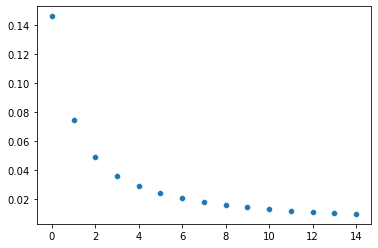

In [302]:
k = [x for x in range(len(loses))]
sns.scatterplot(x=k, y=loses )
#sns.regplot(x=k, y=loses)

<AxesSubplot:title={'center':'W1'}>

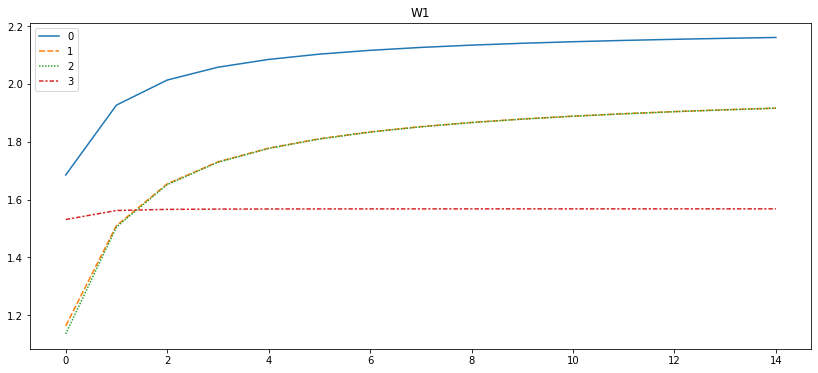

In [303]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("W1")

# Line chart showing daily global streams of each song 
sns.lineplot(data=pd.DataFrame(W1))

<AxesSubplot:>

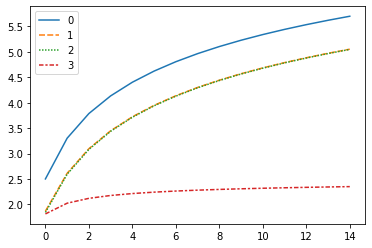

In [304]:
sns.lineplot(data=pd.DataFrame(W))

<AxesSubplot:>

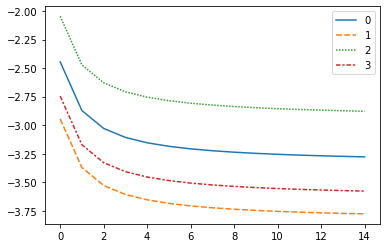

In [305]:
sns.lineplot(data=pd.DataFrame(B1))

<AxesSubplot:>

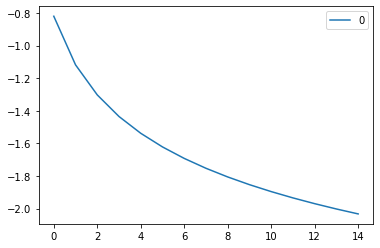

In [306]:
sns.lineplot(data=pd.DataFrame(B))

<AxesSubplot:ylabel='Density'>

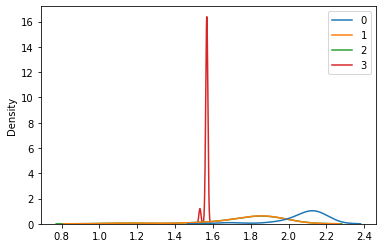

In [307]:
sns.kdeplot(data=pd.DataFrame(W1), shade=False)

<AxesSubplot:ylabel='Density'>

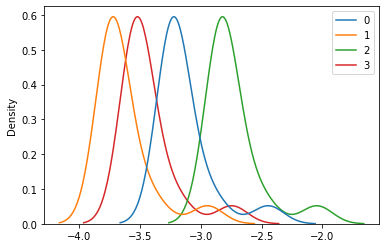

In [308]:
sns.kdeplot(data=pd.DataFrame(B1), shade=False)

<AxesSubplot:ylabel='Density'>

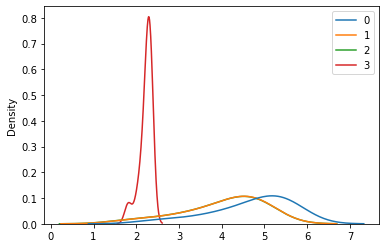

In [309]:
sns.kdeplot(data=pd.DataFrame(W), shade=False)

<AxesSubplot:ylabel='Density'>

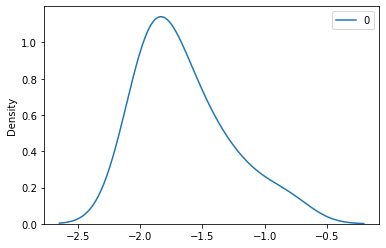

In [310]:
sns.kdeplot(data=pd.DataFrame(B), shade=False)

# the final weights, biases and loss

In [311]:
print("w1:",w1)
print("b1:",b1)
print()
print("w:",w)
print("b:",b)
print()
print("loss:",loss(y,x))

w1: [2.16032946 1.91617649 1.91574099 1.56814025]
b1: [-3.27809456 -3.77809456 -2.87809456 -3.57809456]

w: [5.70170476 5.05407475 5.04914086 2.35028954]
b: -2.032284150880464

loss: 0.034065941257577295
